In [253]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [254]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [255]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [256]:
# create engine to hawaii.sqlite
database_path = "hawaii.sqlite"
engine = create_engine("sqlite:///{}".format(database_path))
print(engine)

Engine(sqlite:///hawaii.sqlite)


In [257]:
# reflect an existing database into a new model
Base = automap_base()

In [258]:

# reflect the tables
Base.prepare(engine, reflect=True)
print(Base.classes.keys())


['measurement', 'station']


In [259]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [260]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [261]:
data = engine.execute("SELECT * FROM Measurement LIMIT 5")
for record in data:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


In [262]:
# Find the most recent date in the data set.
most_recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [263]:
latest_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
latest_date = str(latest_date)
print(latest_date)

2016-08-23


In [264]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column

query = "SELECT * FROM Measurement"  

measurement_df = pd.read_sql_query(query, engine, index_col="id")  
measurement_df.head()

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.08,65.0
2,USC00519397,2010-01-02,0.00,63.0
3,USC00519397,2010-01-03,0.00,74.0
4,USC00519397,2010-01-04,0.00,76.0
5,USC00519397,2010-01-06,NaN,73.0


In [132]:
#create our filter for dates
filter = (measurement_df['date'] >= '2016-08-23') & (measurement_df['date'] <= '2017-08-23')

In [133]:
# Sort the dataframe by date
measurement_df = measurement_df.loc[filter]
measurement_df

,station,date,prcp,tobs
id,,,,
2364,USC00519397,2016-08-23,0.00,81.0
2365,USC00519397,2016-08-24,0.08,79.0
2366,USC00519397,2016-08-25,0.08,80.0
2367,USC00519397,2016-08-26,0.00,79.0
2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...
19546,USC00516128,2017-08-19,0.09,71.0
19547,USC00516128,2017-08-20,NaN,78.0
19548,USC00516128,2017-08-21,0.56,76.0


In [134]:
measurement_to_plot_df = measurement_df.drop(columns=['station', 'tobs'])
measurement_to_plot_df

,date,prcp
id,,
2364,2016-08-23,0.00
2365,2016-08-24,0.08
2366,2016-08-25,0.08
2367,2016-08-26,0.00
2368,2016-08-27,0.00
...,...,...
19546,2017-08-19,0.09
19547,2017-08-20,NaN
19548,2017-08-21,0.56


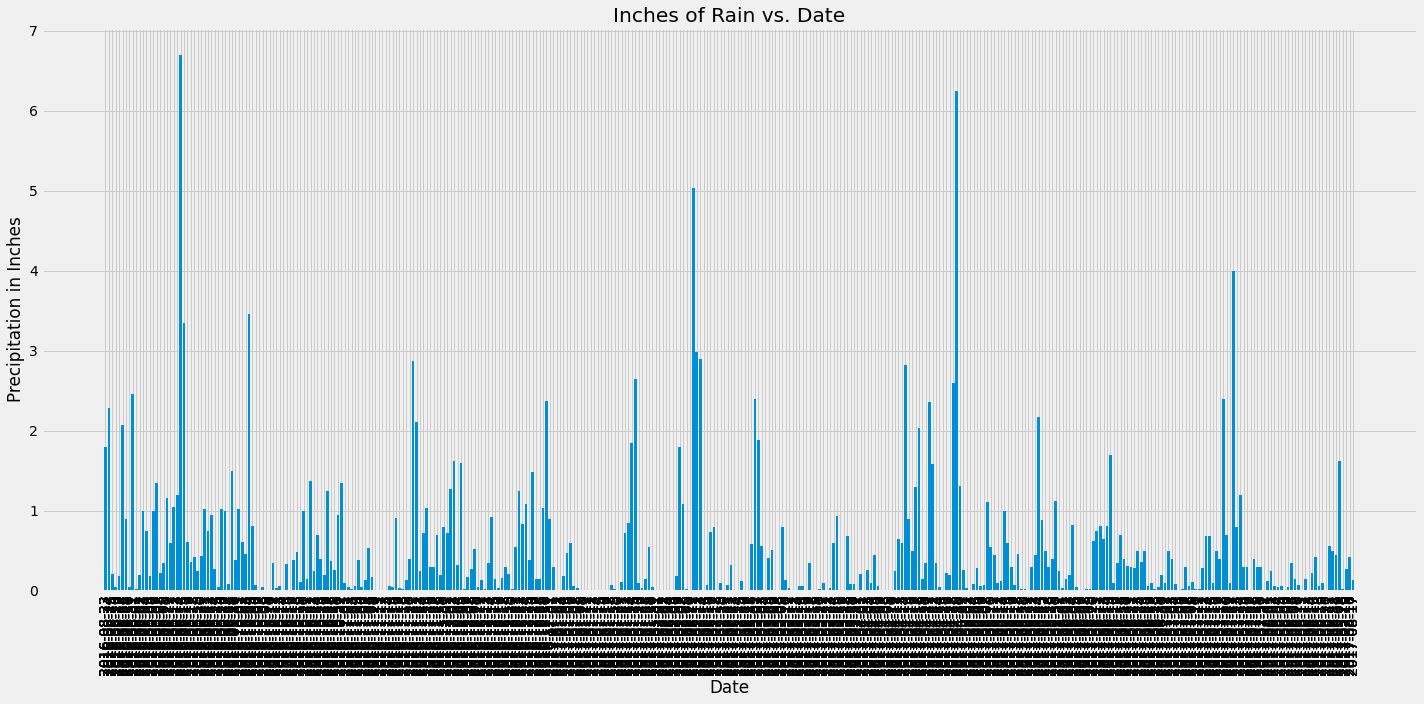

In [246]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = measurement_to_plot_df['date']
y_axis = measurement_to_plot_df['prcp']
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis)
plt.title("Inches of Rain vs. Date")
plt.xlabel("Date")
plt.xticks(x_axis, rotation=90)
plt.ylabel("Precipitation in Inches")
plt.tight_layout()
plt.savefig('precip_date.png')
plt.show()

In [147]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_to_plot_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [151]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(func.count(Measurement.station)).all()
number_stations

[(19550)]

In [209]:
query = "SELECT * FROM Measurement"  
unique_df = pd.read_sql_query(query, engine, index_col="id")  
unique_df.value_counts

<bound method DataFrame.value_counts of            station        date  prcp  tobs
id                                        
1      USC00519397  2010-01-01  0.08  65.0
2      USC00519397  2010-01-02  0.00  63.0
3      USC00519397  2010-01-03  0.00  74.0
4      USC00519397  2010-01-04  0.00  76.0
5      USC00519397  2010-01-06   NaN  73.0
...            ...         ...   ...   ...
19546  USC00516128  2017-08-19  0.09  71.0
19547  USC00516128  2017-08-20   NaN  78.0
19548  USC00516128  2017-08-21  0.56  76.0
19549  USC00516128  2017-08-22  0.50  76.0
19550  USC00516128  2017-08-23  0.45  76.0

[19550 rows x 4 columns]>

In [214]:
new_df = unique_df.groupby('station').count()
new_df

,date,prcp,tobs
station,,,
USC00511918,1979,1932,1979
USC00513117,2709,2696,2709
USC00514830,2202,1937,2202
USC00516128,2612,2484,2612
USC00517948,1372,683,1372
USC00518838,511,342,511
USC00519281,2772,2772,2772
USC00519397,2724,2685,2724
USC00519523,2669,2572,2669


In [208]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [222]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station = unique_df.loc[unique_df["station"] == 'USC00519281', :]
active_station

,station,date,prcp,tobs
id,,,,
12188,USC00519281,2010-01-01,0.15,70.0
12189,USC00519281,2010-01-02,0.00,62.0
12190,USC00519281,2010-01-03,0.00,74.0
12191,USC00519281,2010-01-04,0.00,75.0
12192,USC00519281,2010-01-05,0.00,74.0
...,...,...,...,...
14955,USC00519281,2017-08-14,0.00,77.0
14956,USC00519281,2017-08-15,0.32,77.0
14957,USC00519281,2017-08-16,0.12,76.0


In [230]:
#calculate lowest, highest, and average temp:
column = active_station["tobs"]
max_temp = column.max()
mean_temp = column.mean()
min_temp = column.min()
print(f"maximum temp for the most active station is: {max_temp}")
print(f"average temp for the most active station is: {(round(mean_temp, 2))}")
print(f"minimum temp for the most active station is: {min_temp}")


maximum temp for the most active station is: 85.0
average temp for the most active station is: 71.66
minimum temp for the most active station is: 54.0


In [231]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#filter for the last 12 months of data from our most active station
filter = (active_station['date'] >= '2016-08-23') & (active_station['date'] <= '2017-08-23')

In [232]:
# Sort the dataframe by date
active_station = active_station.loc[filter]
active_station

,station,date,prcp,tobs
id,,,,
14608,USC00519281,2016-08-23,1.79,77.0
14609,USC00519281,2016-08-24,2.15,77.0
14610,USC00519281,2016-08-25,0.06,80.0
14611,USC00519281,2016-08-26,0.01,80.0
14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...
14955,USC00519281,2017-08-14,0.00,77.0
14956,USC00519281,2017-08-15,0.32,77.0
14957,USC00519281,2017-08-16,0.12,76.0


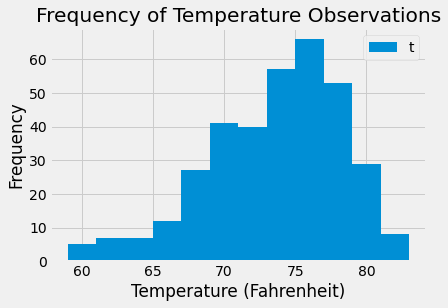

In [252]:
#plot a histogram
bins = 12

x = active_station["tobs"]
legend = "tobs"
plt.hist(x, density=False, bins=bins)  # density=False would make counts
plt.title('Frequency of Temperature Observations')
plt.ylabel('Frequency')
plt.legend(legend, loc='best')
plt.xlabel('Temperature (Fahrenheit)')
plt.savefig('frequency_tobs.png')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()